<a href="https://colab.research.google.com/github/YugantGotmare/Bank-Marketing/blob/master/Bank_marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import f1_score

accuracies = {}
kappaScores= {}
f1scores={}

In [2]:
df = pd.read_csv('/content/bank-additional-full.csv', sep=';')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.shape

(41188, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [7]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [8]:
def bar_plot(variable):
  var =df[variable]
  varValue = var.value_counts()
  plt.figure(figsize=(15,3))
  plt.bar(varValue.index, varValue,color=['#00008b','#00e5ee','#cd1076'])
  plt.xticks(varValue.index, varValue.index.values)
  plt.ylabel("Frequency")
  plt.title(variable)
  plt.show()
  print("{}: \n {}".format(variable,varValue))

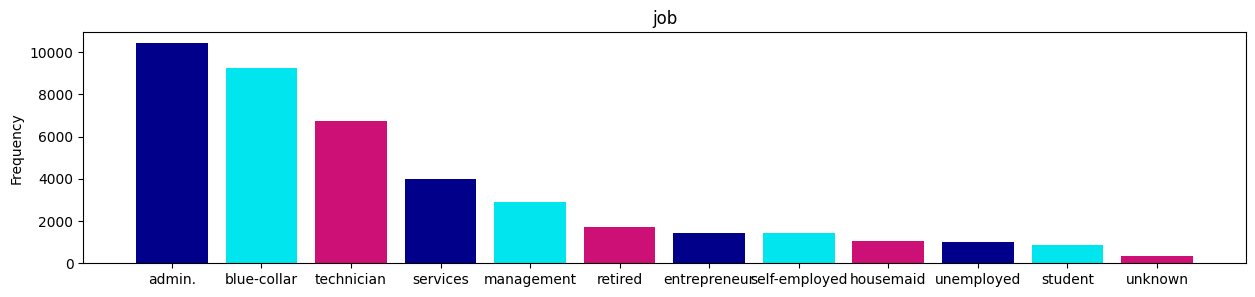

job: 
 admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64


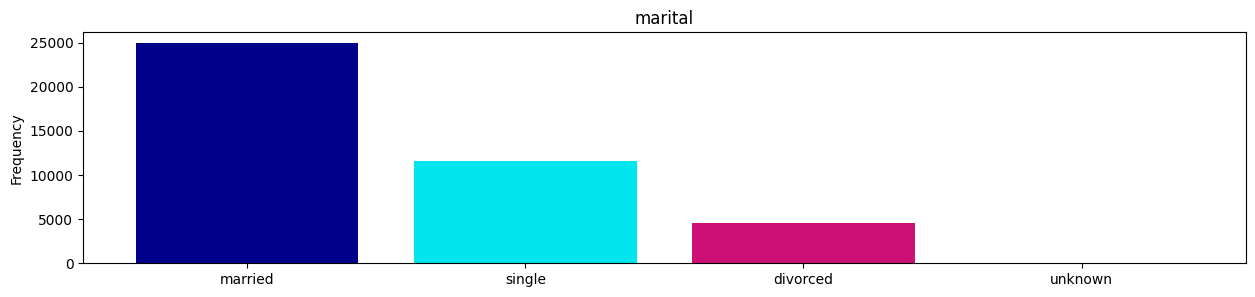

marital: 
 married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64


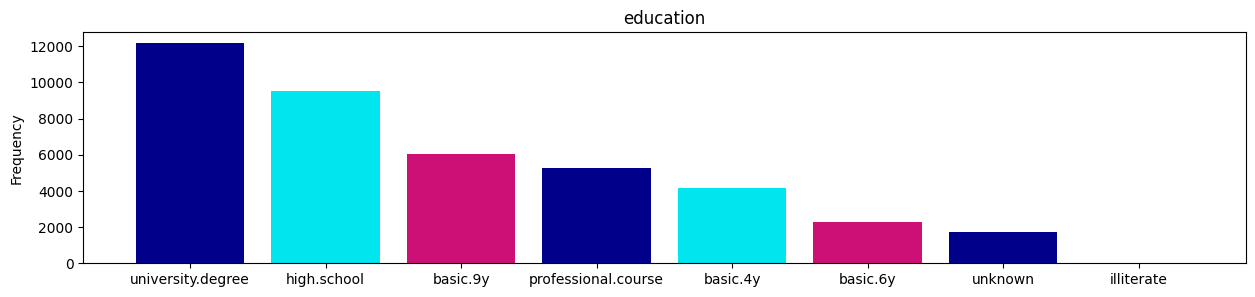

education: 
 university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64


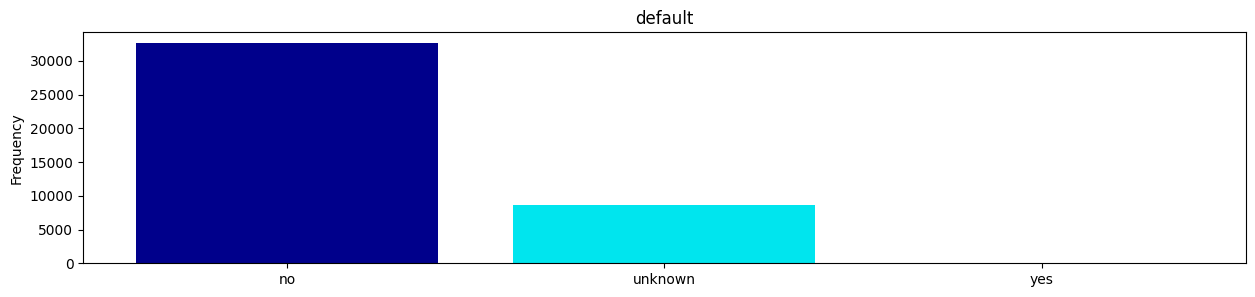

default: 
 no         32588
unknown     8597
yes            3
Name: default, dtype: int64


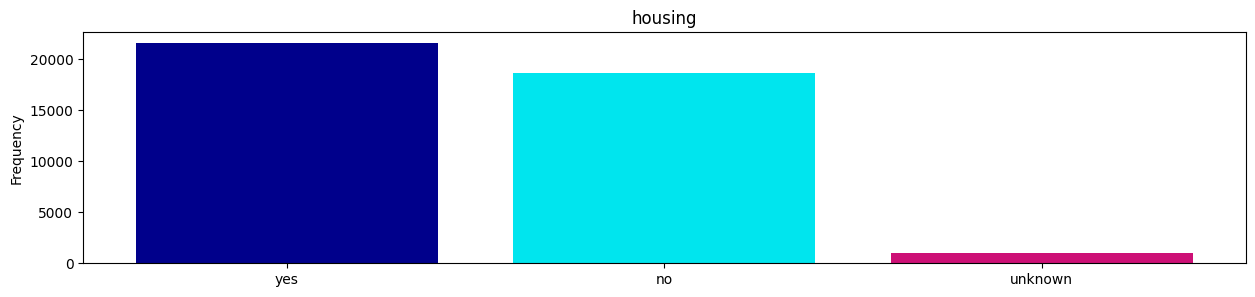

housing: 
 yes        21576
no         18622
unknown      990
Name: housing, dtype: int64


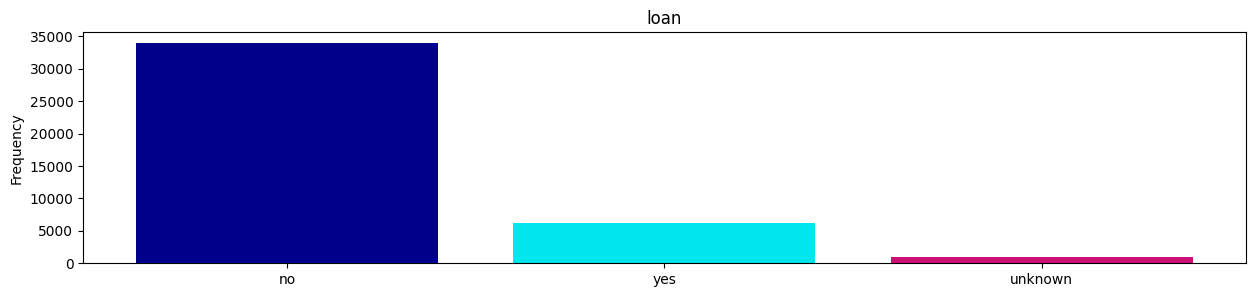

loan: 
 no         33950
yes         6248
unknown      990
Name: loan, dtype: int64


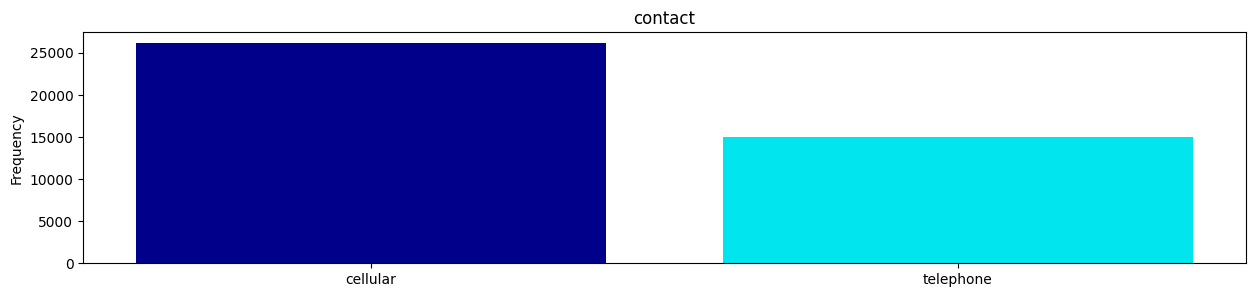

contact: 
 cellular     26144
telephone    15044
Name: contact, dtype: int64


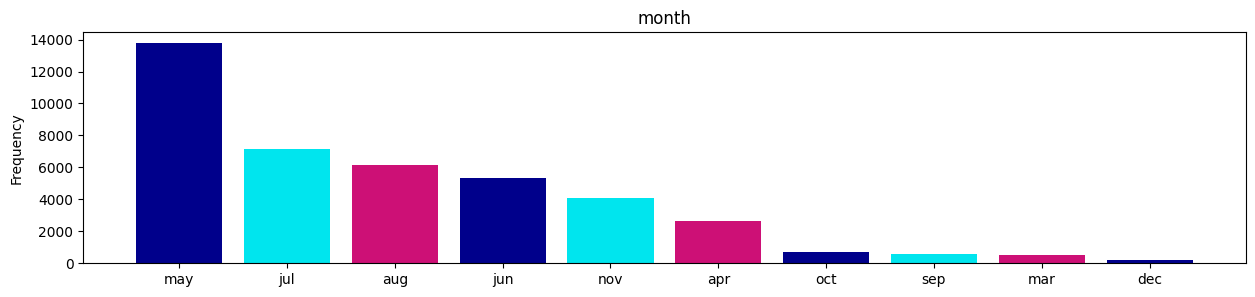

month: 
 may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64


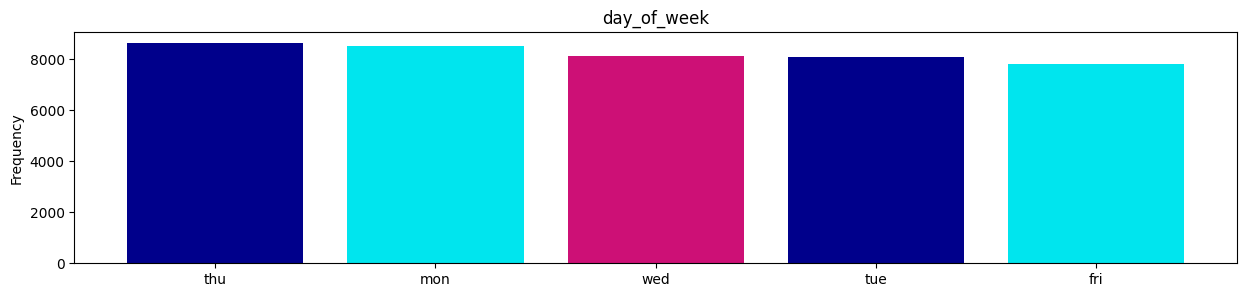

day_of_week: 
 thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64


In [9]:
categoryc = ['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week']
for c in categoryc:
  bar_plot(c)

# **contact:-**

cellular - 0

telephone - 1    

In [10]:
df['contact']=df['contact'].replace("cellular","0")
df['contact']=df['contact'].replace("telephone","1")

In [11]:
df['contact'] = df['contact'].astype(int)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  int64  
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

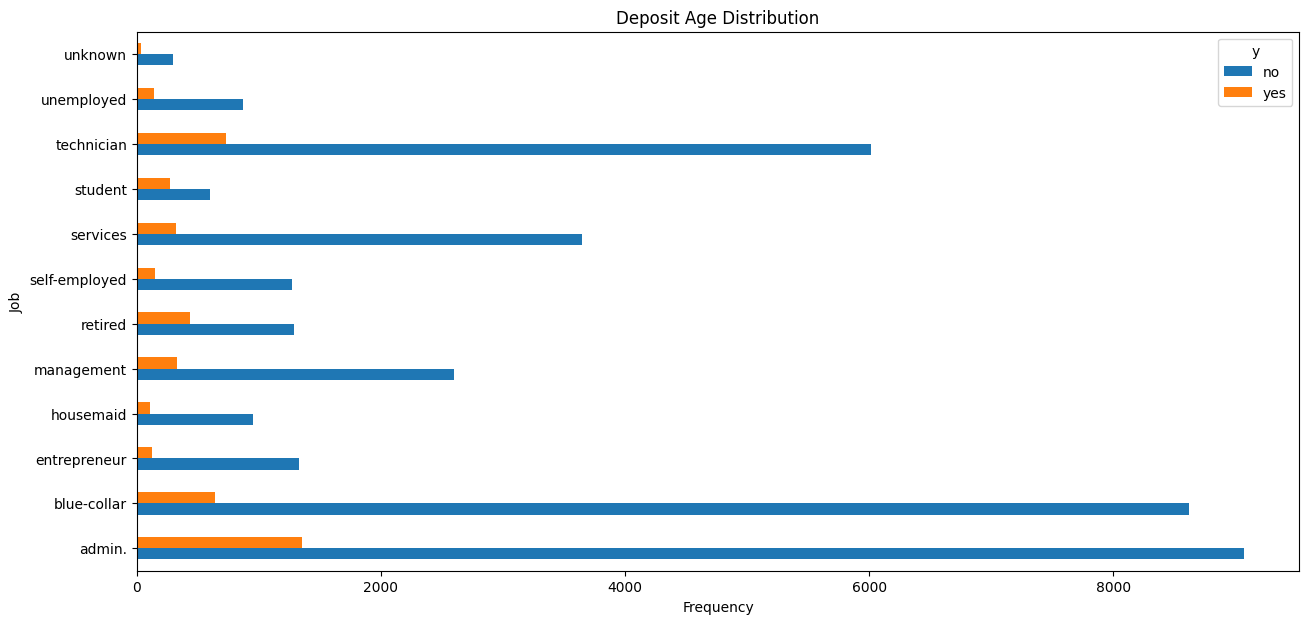

In [13]:
pd.crosstab(df.job,df.y).plot(kind="barh",figsize=(15,7))
plt.title('Deposit Age Distribution')
plt.xlabel('Frequency')
plt.ylabel('Job')
plt.show()

In [14]:
df.corr()

<ipython-input-14-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,contact,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,0.007021,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
contact,0.007021,1.000000,-0.026657,0.077368,0.117970,-0.212848,0.393584,0.591474,0.251614,0.399773,0.269155
duration,-0.000866,-0.026657,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,0.077368,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,0.117970,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,-0.212848,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,0.393584,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.591474,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,0.251614,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,0.399773,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154


No correlaiton r=0

Very weak correlation: r<20

Weak correlation: between 0.20-0.49

Moderate correlation: between 0.5-0.79

Strong correlation: between 0.8-0.99

Perfect correlation: r=1

<ipython-input-15-5ebdc536644d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, linewidths=.5, ax=ax)


<Axes: >

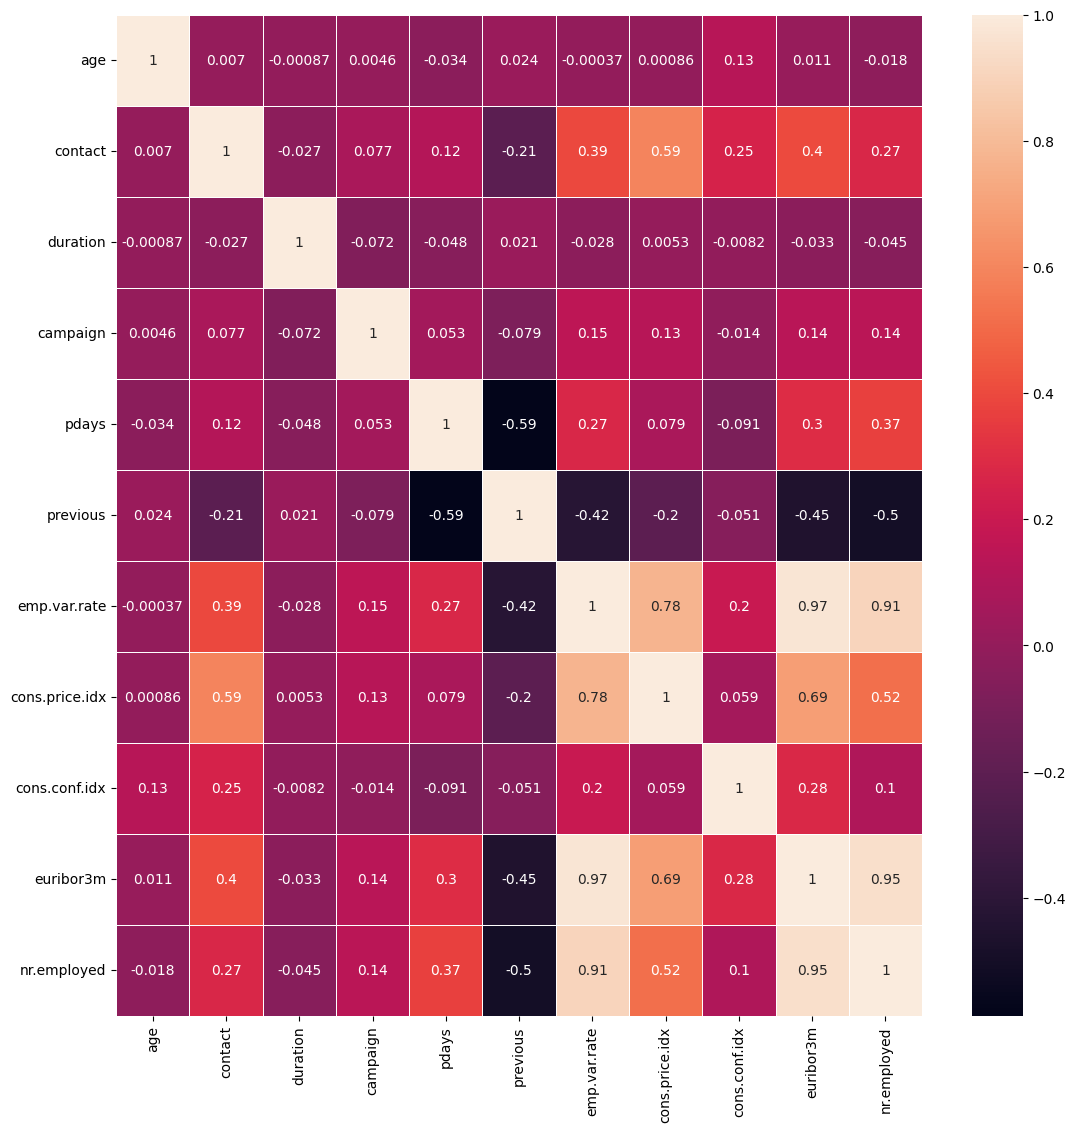

In [15]:
fig, ax = plt.subplots(figsize=(13,13)) # Sample figsize in inches
sns.heatmap(df.corr(), annot=True, linewidths=.5, ax=ax)

In [16]:
df = df.drop(['duration'],axis=1)

In [17]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,1,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,1,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,1,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,1,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,1,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [18]:
columns=df.select_dtypes(include=[object]).columns
df=pd.concat([df,pd.get_dummies(df[columns])],axis=1)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 73 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   job                            41188 non-null  object 
 2   marital                        41188 non-null  object 
 3   education                      41188 non-null  object 
 4   default                        41188 non-null  object 
 5   housing                        41188 non-null  object 
 6   loan                           41188 non-null  object 
 7   contact                        41188 non-null  int64  
 8   month                          41188 non-null  object 
 9   day_of_week                    41188 non-null  object 
 10  campaign                       41188 non-null  int64  
 11  pdays                          41188 non-null  int64  
 12  previous                       41188 non-null 

In [20]:
df=df.drop(columns=['job','marital','education','default','housing','loan', 'month', 'day_of_week', 'poutcome'])

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 64 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   contact                        41188 non-null  int64  
 2   campaign                       41188 non-null  int64  
 3   pdays                          41188 non-null  int64  
 4   previous                       41188 non-null  int64  
 5   emp.var.rate                   41188 non-null  float64
 6   cons.price.idx                 41188 non-null  float64
 7   cons.conf.idx                  41188 non-null  float64
 8   euribor3m                      41188 non-null  float64
 9   nr.employed                    41188 non-null  float64
 10  y                              41188 non-null  object 
 11  job_admin.                     41188 non-null  uint8  
 12  job_blue-collar                41188 non-null 

In [22]:
df.head()

,age,contact,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y_no,y_yes
0,56,1,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
1,57,1,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
2,37,1,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
3,40,1,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
4,56,1,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0


In [23]:
df['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [24]:
df['y']=df['y'].replace("no","0")
df['y']=df['y'].replace("yes","1")

In [25]:
df['y'] = df['y'].astype(int)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 64 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   contact                        41188 non-null  int64  
 2   campaign                       41188 non-null  int64  
 3   pdays                          41188 non-null  int64  
 4   previous                       41188 non-null  int64  
 5   emp.var.rate                   41188 non-null  float64
 6   cons.price.idx                 41188 non-null  float64
 7   cons.conf.idx                  41188 non-null  float64
 8   euribor3m                      41188 non-null  float64
 9   nr.employed                    41188 non-null  float64
 10  y                              41188 non-null  int64  
 11  job_admin.                     41188 non-null  uint8  
 12  job_blue-collar                41188 non-null 

In [27]:
df.drop(columns=['y_no', 'y_yes'],axis=1,inplace=True)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 62 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   contact                        41188 non-null  int64  
 2   campaign                       41188 non-null  int64  
 3   pdays                          41188 non-null  int64  
 4   previous                       41188 non-null  int64  
 5   emp.var.rate                   41188 non-null  float64
 6   cons.price.idx                 41188 non-null  float64
 7   cons.conf.idx                  41188 non-null  float64
 8   euribor3m                      41188 non-null  float64
 9   nr.employed                    41188 non-null  float64
 10  y                              41188 non-null  int64  
 11  job_admin.                     41188 non-null  uint8  
 12  job_blue-collar                41188 non-null 

In [ ]:
df['pdays'].value_counts()

In [31]:
X = df.drop(columns=['y'])
Y = df['y']

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
print(X)

[[ 1.53303429  1.31826996 -0.56592197 ... -0.3392905   0.39770593
  -0.1857    ]
 [ 1.62899323  1.31826996 -0.56592197 ... -0.3392905   0.39770593
  -0.1857    ]
 [-0.29018564  1.31826996 -0.56592197 ... -0.3392905   0.39770593
  -0.1857    ]
 ...
 [ 1.53303429 -0.75856997 -0.20490853 ... -0.3392905   0.39770593
  -0.1857    ]
 [ 0.38152696 -0.75856997 -0.56592197 ... -0.3392905   0.39770593
  -0.1857    ]
 [ 3.26029527 -0.75856997  0.15610492 ...  2.94732687 -2.51442063
  -0.1857    ]]


In [ ]:
accuracies = {}
kappaScores= {}
f1scores={}

In [34]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2, random_state=10)

In [37]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((32950, 61), (8238, 61), (32950,), (8238,))

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [40]:
model_1=LogisticRegression(random_state=101,multi_class='ovr',solver='liblinear')
model_1.fit(X_train,y_train)
prediction_1 = model_1.predict(X_test)

In [42]:
print(classification_report(y_test,prediction_1))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7310
           1       0.62      0.22      0.33       928

    accuracy                           0.90      8238
   macro avg       0.77      0.60      0.64      8238
weighted avg       0.88      0.90      0.87      8238



In [45]:
acc = accuracy_score(y_test,prediction_1)*100
print("Logistic Regression accuracy:",acc)
accuracies['Logistic Regression']=acc
f1=f1_score(y_test,prediction_1)*100
print("F1-Score: ",f1)
f1scores['Logistic Regression']=f1
cohen_kappa = cohen_kappa_score(y_test, prediction_1)*100
print('Cohen Kappa score: ',cohen_kappa)
kappaScores['Logistic Regression']=cohen_kappa

Logistic Regression accuracy: 89.71837824714737
F1-Score:  32.72438443208896
Cohen Kappa score:  28.488601259405


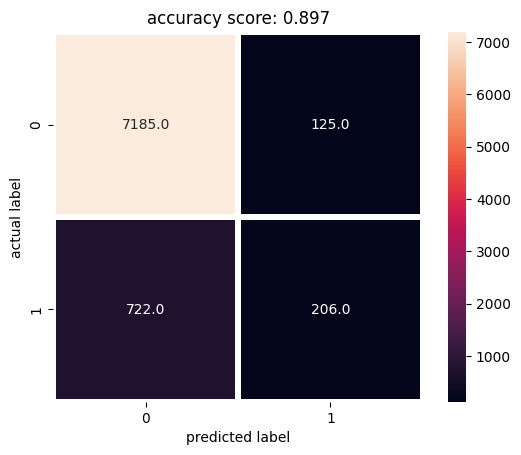

In [48]:
score=round(accuracy_score(y_test,prediction_1),3)
cm= confusion_matrix
cm1=cm(y_test,prediction_1)
sns.heatmap(cm1, annot=True,fmt=".1f",linewidths=3,square=True)
plt.ylabel('actual label')
plt.xlabel('predicted label')
plt.title('accuracy score: {0}'.format(score),size=12)
plt.show()

In [50]:
model_2 = RandomForestClassifier(n_estimators=100, max_depth=12,
random_state=50)
model_2.fit(X_train,y_train)
prediction_2 = model_2.predict(X_test)

In [52]:
acc = accuracy_score(y_test,prediction_2)*100
print("Random Forest accuracy:",acc)

accuracies['Random Forest']=acc
f1=f1_score(y_test,prediction_2)*100
print("F1-Score: ",f1)

f1scores['Random Forest']=f1
cohen_kappa = cohen_kappa_score(y_test, prediction_2)*100
print('Cohen Kappa score: ',cohen_kappa)
kappaScores['Random Forest']=cohen_kappa

Random Forest accuracy: 89.63340616654529
F1-Score:  32.329635499207605
Cohen Kappa score:  28.03880180662678


In [54]:
model_3=GaussianNB()
model_3.fit(X_train,y_train)
prediction_3 = model_3.predict(X_test)

In [55]:
acc = accuracy_score(y_test,prediction_3)*100
print("Naive Bayes accuracy:",acc)
accuracies['Naive Bayes']=acc

f1=f1_score(y_test,prediction_3)*100
print("F1-Score: ",f1)
f1scores['Naive Bayes']=f1

cohen_kappa = cohen_kappa_score(y_test, prediction_3)*100
print('Cohen Kappa score: ',cohen_kappa)
kappaScores['Naive Bayes']=cohen_kappa

Naive Bayes accuracy: 72.77251760135955
F1-Score:  36.36879432624114
Cohen Kappa score:  23.704956596326888


In [57]:
model_4=SGDClassifier(loss='modified_huber',shuffle=True,random_state=100,
                  max_iter=100,eta0=0.2,learning_rate='optimal')
model_4.fit(X_train,y_train)
prediction_4 = model_4.predict(X_test)

In [58]:
acc = accuracy_score(y_test,prediction_4)*100
print("SGD Classifier accuracy:",acc)
accuracies['SGDC']=acc

f1=f1_score(y_test,prediction_4)*100
print("F1-Score: ",f1)
f1scores['SGDC']=f1

cohen_kappa = cohen_kappa_score(y_test, prediction_4)*100
print('Cohen Kappa score: ',cohen_kappa)
kappaScores['SGDC']=cohen_kappa

SGD Classifier accuracy: 88.33454722019908
F1-Score:  34.758995247793614
Cohen Kappa score:  28.82604004259981


In [60]:
model_5= KNeighborsClassifier(n_neighbors = 4,algorithm='ball_tree')
model_5.fit(X_train, y_train)
prediction_5 =model_5.predict(X_test)

In [61]:
acc = accuracy_score(y_test,prediction_5)*100
print("Knn accuracy:",acc)
accuracies['KNN']=acc
f1=f1_score(y_test,prediction_5)*100
print("F1-Score: ",f1)
f1scores['KNN']=f1
cohen_kappa = cohen_kappa_score(y_test, prediction_5)*100
print('Cohen Kappa score: ',cohen_kappa)
kappaScores['KNN']=cohen_kappa

Knn accuracy: 89.06287933964553
F1-Score:  26.688364524003255
Cohen Kappa score:  22.406883823971235


In [62]:
model_6= DecisionTreeClassifier(criterion='gini',max_depth=10,random_state=100)
model_6.fit(X_train, y_train)
prediction_6=model_6.predict(X_test)

In [63]:
acc = accuracy_score(y_test,prediction_6)*100
print("Decision Tree accuracy:",acc)
accuracies['Decision Tree']=acc

f1=f1_score(y_test,prediction_6)*100
print("F1-Score: ",f1)
f1scores['Decision Tree']=f1

cohen_kappa = cohen_kappa_score(y_test, prediction_6)*100
print('Cohen Kappa score: ',cohen_kappa)
kappaScores['Decision Tree']=cohen_kappa

Decision Tree accuracy: 89.62126729788784
F1-Score:  37.45427944403804
Cohen Kappa score:  32.57599964466779


In [66]:
model_7 = Perceptron()
model_7.fit(X_train, y_train)
prediction_7 = model_7.predict(X_test)

In [67]:
acc = accuracy_score(y_test, prediction_7)*100
print("Perceptron accuracy:",acc)
accuracies['Perceptron']=acc

f1=f1_score(y_test,prediction_7)*100
print("F1-Score: ",f1)
f1scores['Perceptron']=f1

cohen_kappa = cohen_kappa_score(y_test, prediction_7)*100
print('Cohen Kappa score: ',cohen_kappa)
kappaScores['Perceptron']=cohen_kappa

Perceptron accuracy: 84.89924739014324
F1-Score:  29.076396807297606
Cohen Kappa score:  20.65842515203158


In [69]:
model_8 = GradientBoostingClassifier(n_estimators=100, learning_rate=0.8,
                                max_depth=2, random_state=0)
model_8.fit(X_train, y_train)
prediction_8 = model_8.predict(X_test)

In [70]:
acc = accuracy_score(y_test, prediction_8)*100
print("Gradient Boosting Classifier accuracy:",acc)
accuracies['Gradient Boosting']=acc

f1=f1_score(y_test,prediction_8)*100
print("F1-Score: ",f1)
f1scores['Gradient Boosted']=f1

cohen_kappa = cohen_kappa_score(y_test, prediction_8)*100
print('Cohen Kappa score: ',cohen_kappa)
kappaScores['Gradient Boosting']=cohen_kappa

Gradient Boosting Classifier accuracy: 89.49987861131342
F1-Score:  30.298146655922643
Cohen Kappa score:  26.098815340116545


In [71]:
model_9 =XGBClassifier(n_estimators=100, learning_rate=0.08, gamma=0,
                  colsample_bytree=1, max_depth=7)
model_9.fit(X_train,y_train)
prediction_9 = model_9.predict(X_test)

In [72]:
acc = accuracy_score(y_test, prediction_9)*100
print("Xgboost Classifier accuracy:",acc)
accuracies['Xgboost Classifier']=acc

f1=f1_score(y_test,prediction_9)*100
print("F1 Score: ",f1)
f1scores['Xgboost Classifier']=f1

cohen_kappa = cohen_kappa_score(y_test, prediction_9)*100
print('Cohen Kappa score: ',cohen_kappa)
kappaScores['Xgboost Classifier']=cohen_kappa

Xgboost Classifier accuracy: 89.64554503520273
F1 Score:  35.42770628311885
Cohen Kappa score:  30.78872332189828


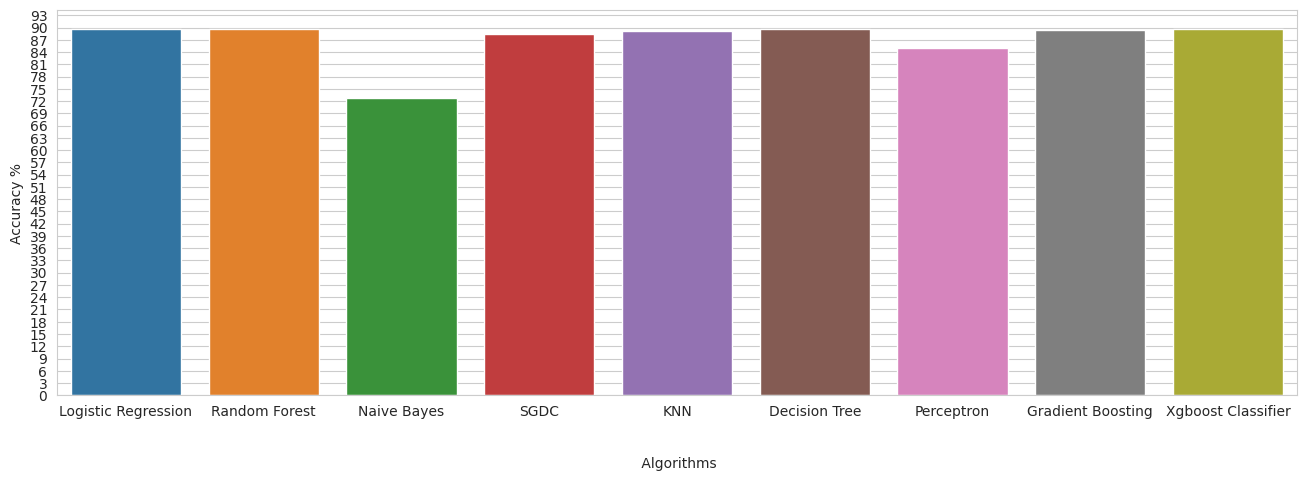

In [79]:
sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,3))
plt.ylabel("Accuracy %")
plt.xlabel("\n\n Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()))
plt.show()

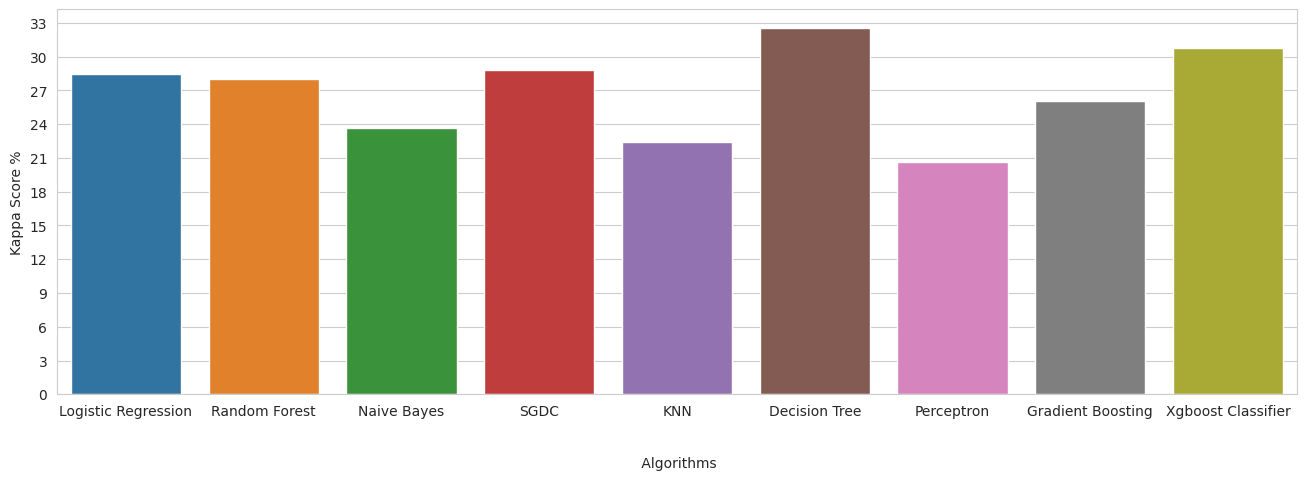

In [78]:
sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,3))
plt.ylabel("Kappa Score %")
plt.xlabel("\n\n Algorithms")
sns.barplot(x=list(kappaScores.keys()), y=list(kappaScores.values()))
plt.show()

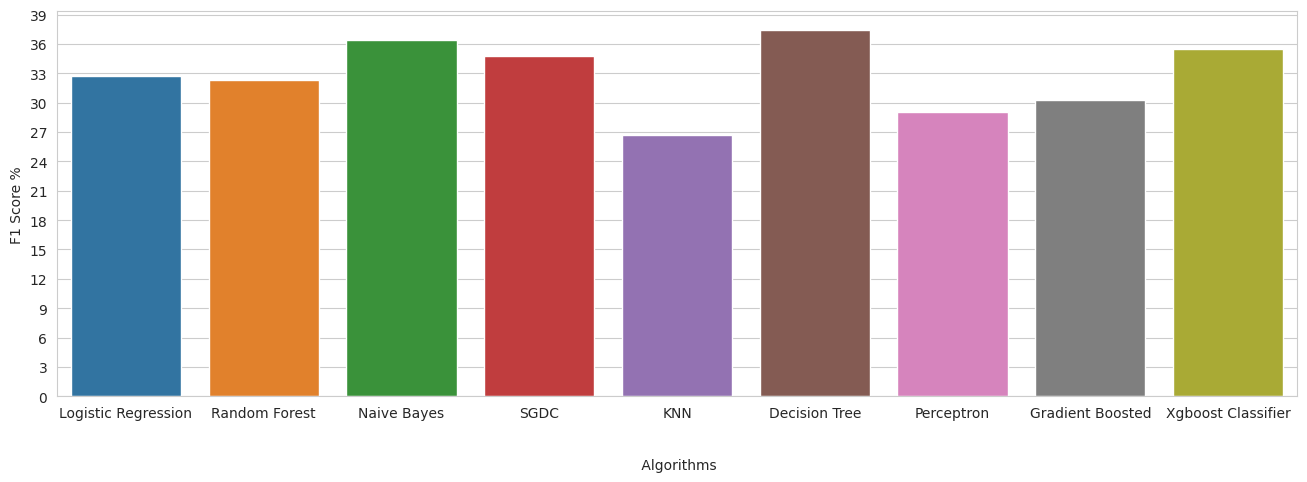

In [77]:
sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,3))
plt.ylabel("F1 Score %")
plt.xlabel("\n\n Algorithms")
sns.barplot(x=list(f1scores.keys()), y=list(f1scores.values()))
plt.show()